In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(print_changed_only=False)
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('output_merged.csv')
df = df.dropna()


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_verdict = LabelEncoder()

In [6]:
df['Animated'] = le.fit_transform(df['Animated'])
df['Lead_Actor'] = le.fit_transform(df['Lead_Actor'])
df['Lead_Actress'] = le.fit_transform(df['Lead_Actress'])
df['Language'] = le.fit_transform(df['Language'])
df['Director'] = le.fit_transform(df['Director'])
df['Music_Director'] = le.fit_transform(df['Music_Director'])
df['CBFC/MPAA'] = le.fit_transform(df['CBFC/MPAA'])
df['Verdict'] = le_verdict.fit_transform(df['Verdict'])
df

Movie Id                  Movie Name  Director  Lead_Actor  \
0            0                interstellar       144         515   
1            1               thedarkknight       144         148   
2            2  theekenruddhaswasrajasthan       471          45   
3            3  lagaanonceuponatimeinindia        61           3   
4            4                     ramsetu         2          19   
...        ...                         ...       ...         ...   
1889      2124                 dummaarodum       793         367   
1890      2126                       sawii       174           8   
1891      2127           10cloverfieldlane       165         590   
1892      2128             jackassthemovie       387         212   
1893      2130         paranormalactivity3       332         394   

      Lead_Actress  Runtime (.)  IMDb_Rating  Language  Animated  Action  ...  \
0               58          169          8.7         1         8       1  ...   
1               56          152          9.0         1         8       1  ...   
2              685          121          6.7         0         8       0  ...   
3              310          224          8.1         2         8       0  ...   
4              358          143          5.2         2         8       0  ...   
...            ...          ...          ...       ...       ...     ...  ...   
1889           426          128          6.2         1         8       0  ...   
1890           868           93          6.6         2         8       0  ...   
1891           770          103          7.2         1         8       0  ...   
1892           281           85          6.6         1         8       1  ...   
1893           528           83          5.8         1         8       0  ...   

      Trailer Views  Trailer Likes (K)  Follower Count (Lead Actor)  \
0        36314005.0                202                      9000000   
1       180000000.0                185                       422000   
2         1419093.0                 92                        15000   
3        10460532.0                 86                      2000000   
4        41621819.0                796                     67000000   
...             ...                ...                          ...   
1889     25004927.0               4238                        26000   
1890     42061546.0               3952                      8000000   
1891     74493329.0               4207                          117   
1892     38980321.0               3998                     26000000   
1893     74738505.0               4155                       104000   

      Follower Count (Lead Actress)  Follower Count (Director)  \
0                          31000000                      97000   
1                          31000000                      97000   
2                            467000                       2064   
3                            146000                        196   
4                          69000000                     209000   
...                             ...                        ...   
1889                         493000                    2000000   
1890                         387000                        391   
1891                        6000000                     342000   
1892                       22000000                      10000   
1893                       75000000                     148000   

      Popularity of Actor Male (POAM)  Popularity of Actress Female (POAF)  \
0                                0.60                                 0.29   
1                                0.32                                 0.39   
2                                0.50                                 0.23   
3                                0.13                                 0.23   
4                                0.33                                 0.46   
...                               ...                                  ...   
1889                    

In [7]:
max_encoded_value = max(le_verdict.classes_)
print(le_verdict.classes_)
max_encoded_value

['Average' 'Blockbuster' 'Disaster' 'Flop' 'Hit' 'Outstanding'
 'Successful' 'Superhit']


'Superhit'

In [8]:
le_name_mapping = dict(zip(le_verdict.classes_, le_verdict.transform(le_verdict.classes_)))
le_name_mapping

{'Average': 0,
 'Blockbuster': 1,
 'Disaster': 2,
 'Flop': 3,
 'Hit': 4,
 'Outstanding': 5,
 'Successful': 6,
 'Superhit': 7}

In [9]:
X = df.drop('Verdict', axis='columns')
X = df.drop('Movie Name', axis='columns')
# X['CSS'] = X['CSS'].fillna(X['CSS'].median())
# X['No. of Screens'] = X['No. of Screens'].fillna(X['No. of Screens'].median())
X


Movie Id  Director  Lead_Actor  Lead_Actress  Runtime (.)  IMDb_Rating  \
0            0       144         515            58          169          8.7   
1            1       144         148            56          152          9.0   
2            2       471          45           685          121          6.7   
3            3        61           3           310          224          8.1   
4            4         2          19           358          143          5.2   
...        ...       ...         ...           ...          ...          ...   
1889      2124       793         367           426          128          6.2   
1890      2126       174           8           868           93          6.6   
1891      2127       165         590           770          103          7.2   
1892      2128       387         212           281           85          6.6   
1893      2130       332         394           528           83          5.8   

      Language  Animated  Action  Adult  ...  Trailer Views  \
0            1         8       1      0  ...     36314005.0   
1            1         8       1      0  ...    180000000.0   
2            0         8       0      0  ...      1419093.0   
3            2         8       0      0  ...     10460532.0   
4            2         8       0      0  ...     41621819.0   
...        ...       ...     ...    ...  ...            ...   
1889         1         8       0      0  ...     25004927.0   
1890         2         8       0      0  ...     42061546.0   
1891         1         8       0      0  ...     74493329.0   
1892         1         8       1      0  ...     38980321.0   
1893         1         8       0      0  ...     74738505.0   

      Trailer Likes (K)  Follower Count (Lead Actor)  \
0                   202                      9000000   
1                   185                       422000   
2                    92                        15000   
3                    86                      2000000   
4                   796                     67000000   
...                 ...                          ...   
1889               4238                        26000   
1890               3952                      8000000   
1891               4207                          117   
1892               3998                     26000000   
1893               4155                       104000   

      Follower Count (Lead Actress)  Follower Count (Director)  \
0                          31000000                      97000   
1                          31000000                      97000   
2                            467000                       2064   
3                            146000                        196   
4                          69000000                     209000   
...                             ...                        ...   
1889                         493000                    2000000   
1890                         387000                        391   
1891                        6000000                     342000   
1892                       22000000                      10000   
1893                       75000000                     148000   

      Popularity of Actor Male (POAM)  Popularity of Actress Female (POAF)  \
0                                0.60                                 0.29   
1                                0.32                                 0.39   
2                                0.50                                 0.23   
3                                0.13                                 0.23   
4                                0.33                                 0.46   
...                               ...                                  ...   
1889                             0.16                                 0.14   
1890                             0.42                                 0.37   
1891                             0.58                                 0.53   
1892                             0.40     

In [10]:
nan_columns = X.columns[X.isna().any()].tolist()
if nan_columns:
    print("Columns with NaN values:", nan_columns)
else:
    print("No NaN values found in any column.")

No NaN values found in any column.


In [11]:
y = df['Verdict']
y.dropna()

0       1
1       4
2       7
3       1
4       3
       ..
1889    1
1890    0
1891    0
1892    0
1893    1
Name: Verdict, Length: 1894, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear', 'poly']}

In [14]:
# grid_search = GridSearchCV(SVC(), param_grid, cv=3)
# grid_search.fit(X_train, y_train)

In [15]:
# best_params = grid_search.best_params_

model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
model.score(X_test, y_test)

0.4092827004219409

In [17]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [18]:
y_predicted_verdict_all = model.predict(X)
df['Predicted Verdict by SVM'] = le_verdict.inverse_transform(y_predicted_verdict_all)
df['Verdict'] = le_verdict.inverse_transform(y)
df.to_csv('output_with_predictions.csv', index=False)

Text(95.72222222222221, 0.5, 'Truth')

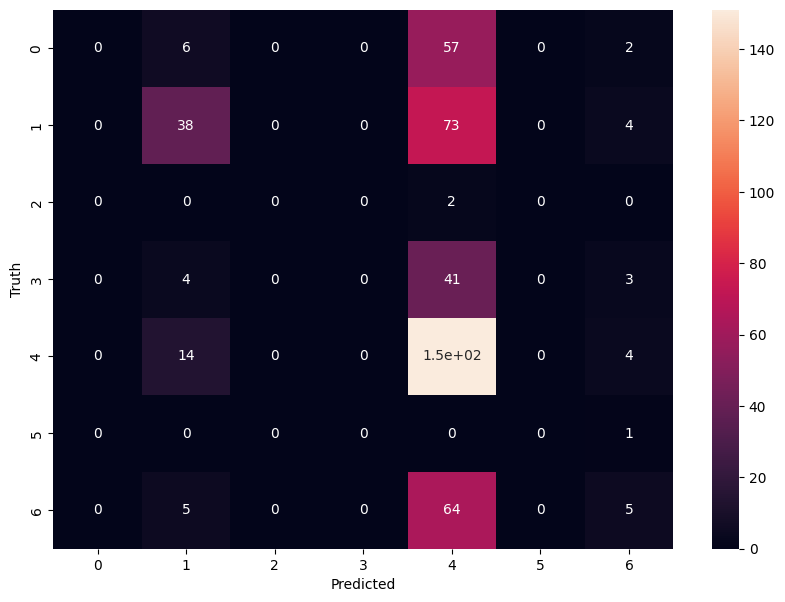

In [19]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_predicted)
round(ac, 3)

0.409

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predicted, average=None)
f1

array([0.        , 0.41758242, 0.        , 0.        , 0.54219031,
       0.        , 0.10752688])

In [22]:
from sklearn.metrics import recall_score
rs = recall_score(y_test, y_predicted, average=None)
rs

array([0.        , 0.33043478, 0.        , 0.        , 0.89349112,
       0.        , 0.06756757])

In [23]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_predicted, average=None)
ps

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.        , 0.56716418, 0.        , 0.        , 0.38917526,
       0.        , 0.26315789])

In [24]:
print("Confusion Matrix:\n", cm)
print("\nF1 Score:", f1)
print("\nRecall Score", rs)
print("\nPrecision Score:", ps)

Confusion Matrix:
 [[  0   6   0   0  57   0   2]
 [  0  38   0   0  73   0   4]
 [  0   0   0   0   2   0   0]
 [  0   4   0   0  41   0   3]
 [  0  14   0   0 151   0   4]
 [  0   0   0   0   0   0   1]
 [  0   5   0   0  64   0   5]]

F1 Score: [0.         0.41758242 0.         0.         0.54219031 0.
 0.10752688]

Recall Score [0.         0.33043478 0.         0.         0.89349112 0.
 0.06756757]

Precision Score: [0.         0.56716418 0.         0.         0.38917526 0.
 0.26315789]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


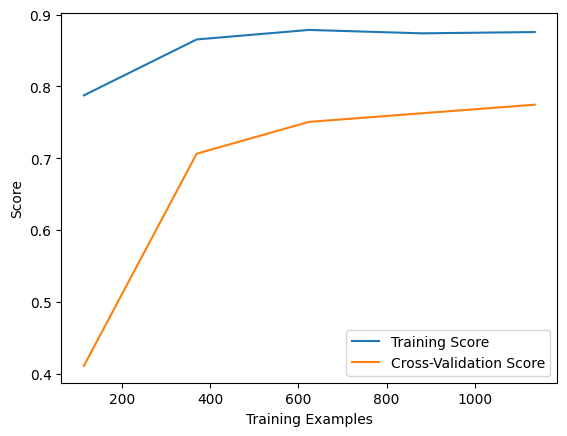

In [25]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [26]:
weighted_f1 = f1_score(y_test, y_predicted, average='weighted')
weighted_recall = recall_score(y_test, y_predicted, average='weighted')
weighted_precision = precision_score(y_test, y_predicted, average='weighted')

print("Weighted F1 Score:", weighted_f1)
print("Weighted Recall Score:", weighted_recall)
print("Weighted Precision Score:", weighted_precision)

Weighted F1 Score: 0.31141166423878086
Weighted Recall Score: 0.4092827004219409
Weighted Precision Score: 0.31744342481907656


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
